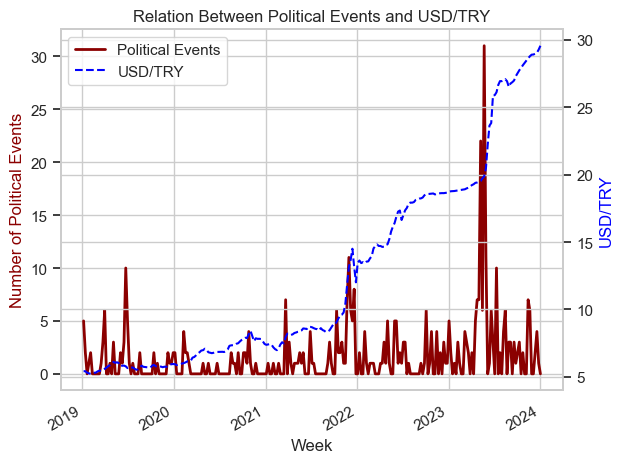

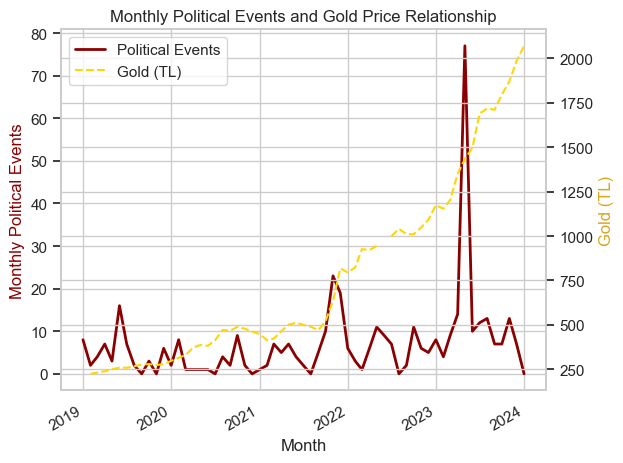


📊 Correlation Matrix:
                         EVENT_COUNT  ALTIN FIYATI: (TÜRKIYE)  USD_TRY  FİYAT
EVENT_COUNT                     1.00                     0.52     0.09   0.12
ALTIN FIYATI: (TÜRKIYE)         0.52                     1.00     0.59   0.62
USD_TRY                         0.09                     0.59     1.00   0.99
FİYAT                           0.12                     0.62     0.99   1.00


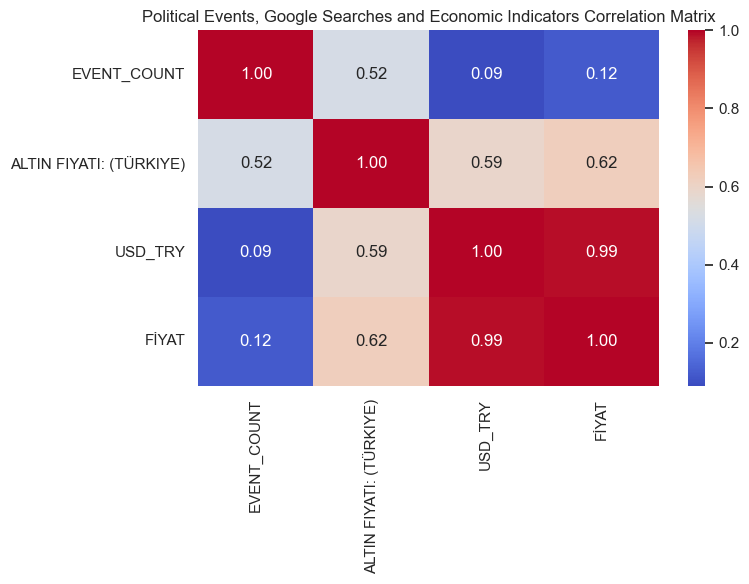

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

# 1. Read the data
df = pd.read_csv('../data/processed/merged_analysis.csv', parse_dates=['Week'])

# 2. Date range 2019 to 2024
full_range = pd.date_range(start='2019-01-07', end='2024-01-01', freq='W-MON')

# 3. Set week column as index
df.set_index('Week', inplace=True)

# 4. Add missing weeks
df = df.reindex(full_range)

# 5. Set week column as index again
df.reset_index(inplace=True)
df.rename(columns={'index': 'WEEK'}, inplace=True)

# 6. Clear and upperword
df.columns = df.columns.str.strip().str.upper()
df['FİYAT'] = pd.to_numeric(df['FİYAT'], errors='coerce')

# 7. İf EVENT_COUNT is missing set to 0
if 'EVENT_COUNT' not in df.columns:
    raise ValueError("'EVENT_COUNT' sütunu eksik, CSV'yi kontrol et.")
df['EVENT_COUNT'] = df['EVENT_COUNT'].fillna(0)


# 9. Graph: Political Events + USD/TRY
plt.figure()
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(df['WEEK'], df['EVENT_COUNT'], color='darkred', label='Political Events', linewidth=2)
ax2.plot(df['WEEK'], df['USD_TRY'], color='blue', linestyle='--', label='USD/TRY')

ax1.set_ylabel('Number of Political Events', color='darkred')
ax2.set_ylabel('USD/TRY', color='blue')
plt.title('Relation Between Political Events and USD/TRY')
ax1.set_xlabel('Week')
fig = plt.gcf()
fig.autofmt_xdate()
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
plt.tight_layout()
plt.savefig('../data/processed/plot_event_vs_usd.png')
plt.show()

# Graph: Monthly Political Events + Gold
# 1. For political week
df['AY_Olay'] = pd.to_datetime(df['WEEK']).dt.to_period('M').dt.to_timestamp()

# 2. For gold date
df['AY_Altin'] = pd.to_datetime(df['DATE']).dt.to_period('M').dt.to_timestamp()

# 3. Grouped
monthly_events = df.groupby('AY_Olay')['EVENT_COUNT'].sum().reset_index()
monthly_gold = df.groupby('AY_Altin')['FİYAT'].mean().reset_index()

# 4. Graph
plt.figure()
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(monthly_events['AY_Olay'], monthly_events['EVENT_COUNT'], color='darkred', label='Political Events', linewidth=2)
ax2.plot(monthly_gold['AY_Altin'], monthly_gold['FİYAT'], color='gold', linestyle='--', label='Gold (TL)')

ax1.set_ylabel('Monthly Political Events', color='darkred')
ax2.set_ylabel('Gold (TL)', color='goldenrod')
plt.title('Monthly Political Events and Gold Price Relationship')
ax1.set_xlabel('Month')
fig = plt.gcf()
fig.autofmt_xdate()
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
plt.tight_layout()
plt.savefig('../data/processed/plot_event_vs_gold_monthly.png')
plt.show()



# 11. Correlation Matrix

# Find Google Trends column
trend_col = None
for col in df.columns:
    if col not in ['WEEK', 'EVENT_COUNT', 'USD_TRY', 'FİYAT'] and pd.api.types.is_numeric_dtype(df[col]):
        trend_col = col
        break

if trend_col is None:
    raise ValueError("Google Trends sütunu bulunamadı!")

# Calculate
correlation_df = df[['EVENT_COUNT', trend_col, 'USD_TRY', 'FİYAT']].dropna()
correlation_matrix = correlation_df.corr().round(2)

print("\n📊 Correlation Matrix:")
print(correlation_matrix)

# Map
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Political Events, Google Searches and Economic Indicators Correlation Matrix')
plt.tight_layout()
plt.savefig('../data/processed/correlation_heatmap.png')
plt.show()
